In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

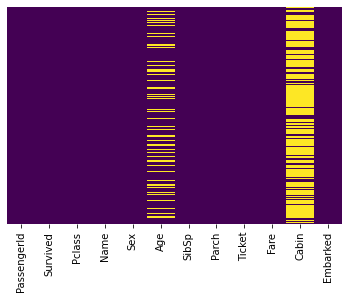

In [9]:
#find missing data using seaborn
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [39]:
#since Cabin is missing too much data we remove it
train = train.drop(['Cabin'], axis=1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

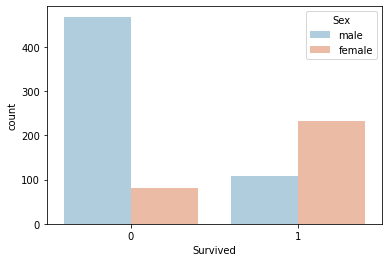

In [12]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

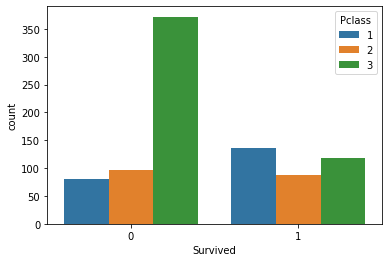

In [13]:
sns.countplot(x='Survived', hue='Pclass', data=train)

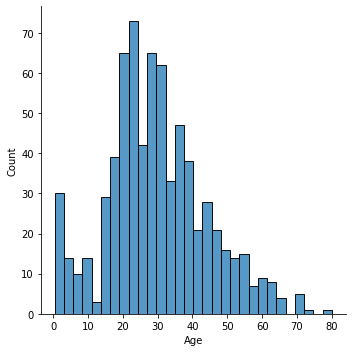

In [14]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

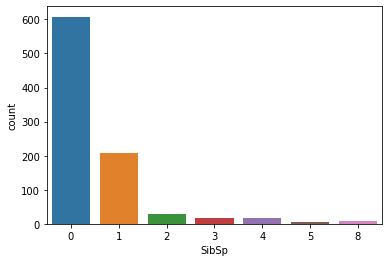

In [16]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

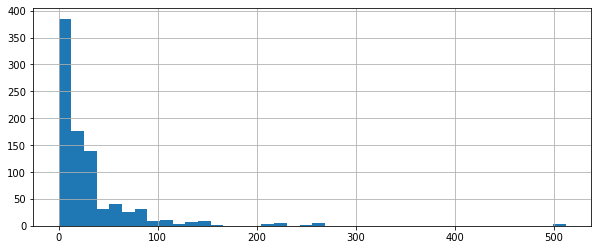

In [19]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [22]:
import cufflinks as cf
cf.go_offline()

In [5]:
train['Fare'].iplot(kind='hist', bins=30)

fill in missing Age data

substitute NIL with average age

this is called amputation

take it a step further and fill average age by passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

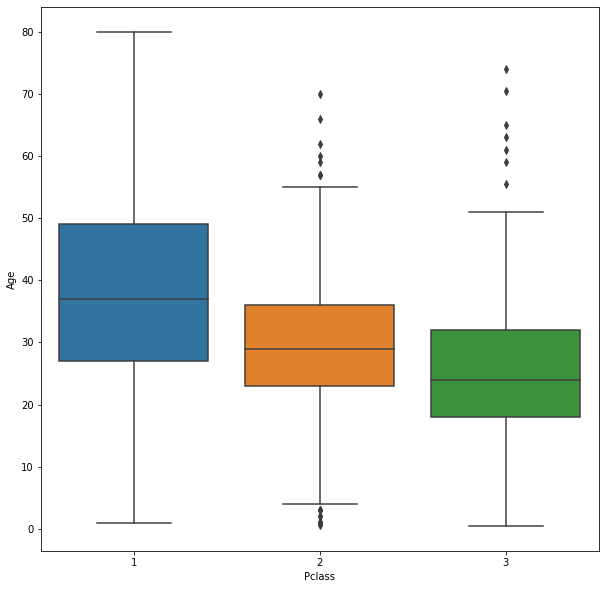

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=train)

In [40]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age 

In [41]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

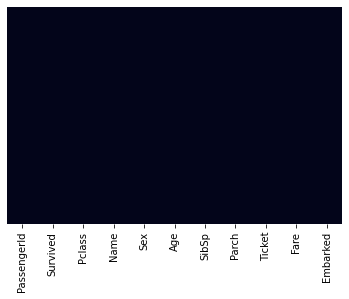

In [42]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [43]:
train.dropna(inplace=True)

change 'male' and 'female' to 0s and 1s

will also do the same for 'Embarked'

In [44]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [46]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [48]:
train = pd.concat([train, sex, embark], axis=1)
train = train.drop(['Sex', 'Name', 'Ticket', 'Embarked', 'PassengerId'], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression(max_iter=1000)

In [62]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
predictions = logmodel.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)